In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [523]:
df_train=pd.read_csv("Bigmart_Train")

In [524]:
df_test=pd.read_csv("Bigmart_Test")

In [525]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [526]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [527]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [528]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [529]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [530]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [531]:
df_train.shape

(8523, 12)

In [532]:
df_test.shape

(5681, 11)

In [533]:
# Total percentage of the missing values
missing_data = df_train.isnull().sum()
total_percentage = (missing_data.sum()/df_train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [534]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_total = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [535]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_total = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


In [536]:
cat_col = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [537]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [538]:

# print the categorical columns
for col in cat_col:
    print(col)
    print(df_train[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [539]:
# fill the missing values
item_weight_mean = df_train.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [540]:

miss_bool = df_train['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [541]:
for i, item in enumerate(df_train['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df_train['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df_train['Item_Weight'][i] = np.mean(df_train['Item_Weight'])

In [542]:
df_train['Item_Weight'].isnull().sum()

0

In [543]:
outlet_size_mode = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [544]:
miss_bool = df_train['Outlet_Size'].isnull()
df_train.loc[miss_bool, 'Outlet_Size'] = df_train.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [545]:
df_train['Outlet_Size'].isnull().sum()

0

In [546]:
sum(df_train['Item_Visibility']==0)

526

In [547]:
df_train.loc[:, 'Item_Visibility'].replace([0], [df_train['Item_Visibility'].mean()], inplace=True)


In [548]:
sum(df_train['Item_Visibility']==0)


0

In [549]:
# combine item fat content
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Test data

In [550]:
outlet_size_mode = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [551]:

miss_bool = df_test['Outlet_Size'].isnull()
df_test.loc[miss_bool, 'Outlet_Size'] = df_test.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [552]:
df_test['Outlet_Size'].isnull().sum()

0

In [553]:
# fill the missing values
item_weight_mean = df_test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [554]:
miss_bool = df_test['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [555]:
for i, item in enumerate(df_test['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df_test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df_test['Item_Weight'][i] = np.mean(df_test['Item_Weight'])

In [556]:
df_test['Item_Weight'].isnull().sum()

0

In [557]:
outlet_size_mode = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [558]:
miss_bool = df_test['Outlet_Size'].isnull()
df_test.loc[miss_bool, 'Outlet_Size'] = df_test.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [559]:
df_test['Outlet_Size'].isnull().sum()

0

In [560]:
sum(df_test['Item_Visibility']==0)

353

In [561]:
df_test.loc[:, 'Item_Visibility'].replace([0], [df_test['Item_Visibility'].mean()], inplace=True)


In [562]:
sum(df_test['Item_Visibility']==0)


0

In [563]:
# combine item fat content
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

New columns

In [564]:
df_train['New_Item_Type'] = df_train['Item_Identifier'].apply(lambda x: x[:2])
df_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [565]:
df_train['New_Item_Type'] = df_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [566]:
df_train.loc[df_train['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [567]:
# create small values for establishment year
df_train['Outlet_Years'] = 2013 - df_train['Outlet_Establishment_Year']
df_train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [568]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [569]:
df_test['New_Item_Type'] = df_test['Item_Identifier'].apply(lambda x: x[:2])
df_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [570]:
df_test['New_Item_Type'] = df_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [571]:
df_test.loc[df_train['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_test['Item_Fat_Content'].value_counts()

Low Fat       3032
Regular       1619
Non-Edible    1030
Name: Item_Fat_Content, dtype: int64

In [572]:
# create small values for establishment year
df_test['Outlet_Years'] = 2013 - df_test['Outlet_Establishment_Year']
df_test['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

EDA

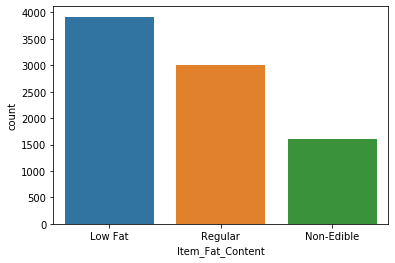

In [573]:
sns.countplot(df_train["Item_Fat_Content"])

Low fat & Regular Item_Fat_content have higher count than non-edible 

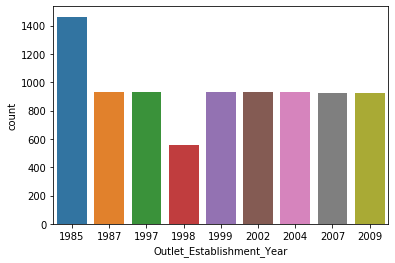

In [574]:
sns.countplot(df_train['Outlet_Establishment_Year'])

In [575]:
def count_plot(x):
    sns.countplot(df_train[x])
    plt.show()

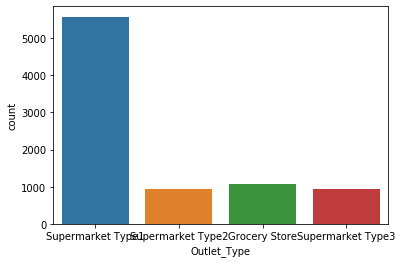

In [576]:
count_plot('Outlet_Type')

supermarket type 1 has higher count.

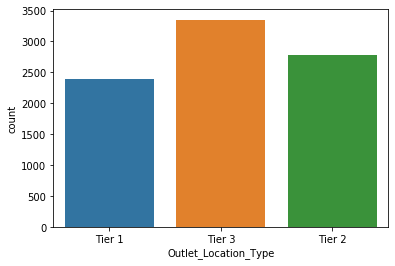

In [577]:
count_plot('Outlet_Location_Type')

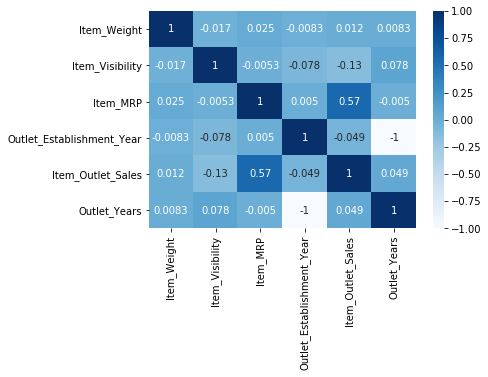

In [578]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

item weight is not so much correlated with all items

In [579]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Outlet'] = le.fit_transform(df_train['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df_train[col] = le.fit_transform(df_train[col])

In [580]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [581]:
x = df_train.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [606]:
x.skew()

Item_Weight             0.090561
Item_Fat_Content        0.211160
Item_Visibility         1.286877
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.861866
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
New_Item_Type           0.114510
Outlet_Years            0.396641
Outlet                 -0.059861
dtype: float64

Item_Visibility,outlet type and Outlet_Size is highly skewed as its value is much greater than range +/- 0.5

In [582]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,1,14,9
1,5.92,2,0.019278,14,48.2692,1,2,2,0,4,3
2,17.50,0,0.016760,10,141.6180,1,0,1,1,14,9
3,19.20,2,0.066132,6,182.0950,2,2,0,1,15,0
4,8.93,1,0.066132,9,53.8614,0,2,1,2,26,1


In [583]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [584]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumable,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,12.695633,Non-Edible,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28


In [585]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Outlet'] = le.fit_transform(df_test['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df_test[col] = le.fit_transform(df_test[col])

In [586]:
test=df_test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])

In [587]:
test.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
New_Item_Type           0
Outlet_Years            0
Outlet                  0
dtype: int64

In [588]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge

In [589]:
lr=LinearRegression()

In [590]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    rscore=r2_score(y_test,predlr)
    if rscore>maxr2:
        maxr2=rscore
        maxRS=i
print("Best r score is ",maxr2," on Random_state ",maxRS)

Best r score is  0.5293574745185413  on Random_state  178


In [591]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(cv_mean)
    

0.5013247637509501
0.5017749941945654
0.5005015326446087
0.5015816202814312
0.5010839874345824
0.502106155925593
0.5013912925950572
0.5015363166748954


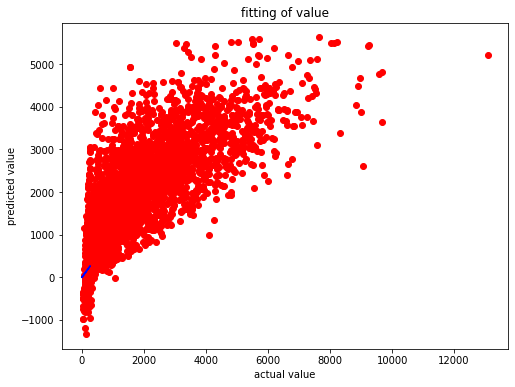

In [592]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(x_test,x_test,color='b')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('fitting of value')
plt.show()

GridSearch

In [593]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

Overfitting/underfitting- Lasso 

In [594]:
parameters={'alpha':[0.0001,0.001,0.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [595]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5074057863965762

In [596]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5015800659382428

In [597]:
from sklearn.ensemble import RandomForestRegressor

In [598]:
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_params_)


0.5751954577412006
{'criterion': 'mae', 'max_features': 'sqrt'}


In [599]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec=rf.predict(x_test)
rfs=r2_score(y_test,pred_dec)
print('rfs score:', rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfscore=rfscore.mean()
print('cross val:',rfscore*100)

rfs score: 55.02727814140207
cross val: 54.754550824816484


In [600]:
rf.predict(test)

array([1687.443468, 1223.793664,  866.33896 , ..., 1887.64287 ,
       4517.965666, 1440.285192])

In [601]:
import joblib

In [602]:
joblib.dump(rf,'bigmart.obj') #dumping the value

['bigmart.obj']